Best Parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Decision Tree Metrics:
accuracy :  0.9598108747044918  , precision :  0.9604495873252872  , recall :  0.9598108747044918  , f1 :  0.9598252074739891


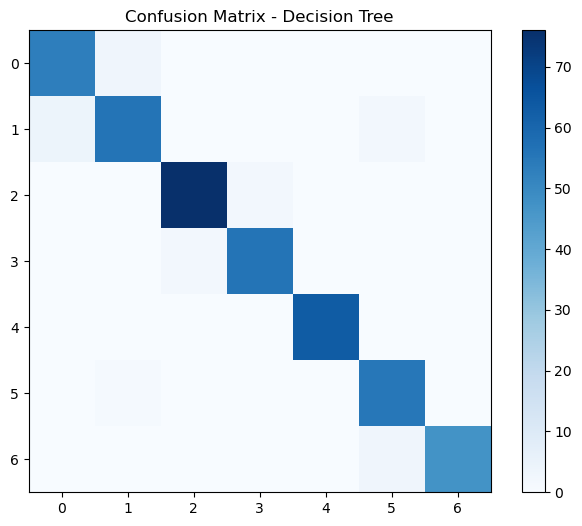

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv("ObesityDataSet.csv")

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Define the target variable and features
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

label_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Detect and drop 5% outliers
outliers_to_drop = []
for column in numerical_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
    outliers_to_drop.extend(outliers)

# Drop 5% of outliers
percentage_to_drop = 0.05
to_drop = int(percentage_to_drop * len(outliers_to_drop))
outliers_to_drop = np.random.choice(outliers_to_drop, size=to_drop, replace=False)
data = data.drop(outliers_to_drop)

# Update target and features after dropping outliers
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, label_columns)
    ])

# pipeline for preprocessing and Decision Tree classification
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier())])

# Define the parameter grid search for Decision Tree
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# fit GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

# Train Decision Tree model with best parameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train, y_train)

# Predictions on the test set using the best Decision Tree model
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt, average='weighted')
recall_best_dt = recall_score(y_test, y_pred_best_dt, average='weighted')
f1_best_dt = f1_score(y_test, y_pred_best_dt, average='weighted')
print("Best Decision Tree Metrics:")
print("accuracy : ", accuracy_best_dt, " , precision : ", precision_best_dt, " , recall : ", recall_best_dt, " , f1 : ", f1_best_dt)

cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_best_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
plt.show()


Best Parameters for Random Forest: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best Random Forest Metrics:
accuracy :  0.9361702127659575  , precision :  0.9370825516402224  , recall :  0.9361702127659575  , f1 :  0.9364640325921695
Confusion Matrix for the best Random Forest model:
[[54  2  0  0  0  0  0]
 [ 1 56  0  0  0  5  0]
 [ 0  2 74  1  0  0  1]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 47  3]
 [ 0  0  1  0  0  3 46]]


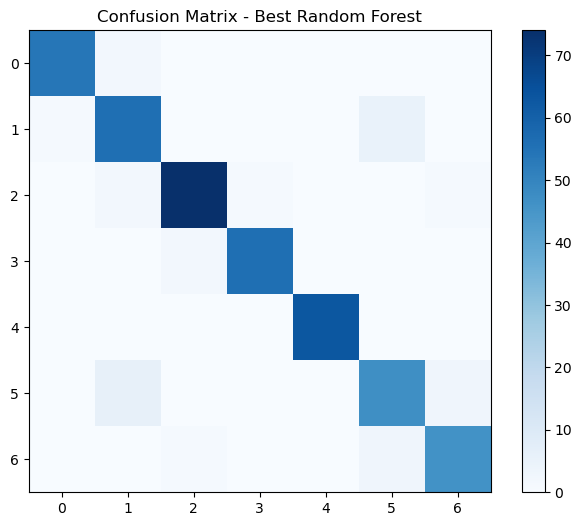

/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and w


Best Parameters for Bagging: {'classifier__max_features': 0.7, 'classifier__max_samples': 0.9, 'classifier__n_estimators': 30}


/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Best Bagging Metrics:
accuracy :  0.9456264775413712  , precision :  0.9464878967038621  , recall :  0.9456264775413712  , f1 :  0.9457950896587358
Confusion Matrix for the best Bagging model:
[[55  1  0  0  0  0  0]
 [ 2 56  0  0  0  4  0]
 [ 0  1 72  4  0  0  1]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  1  0  0  0  1 48]]


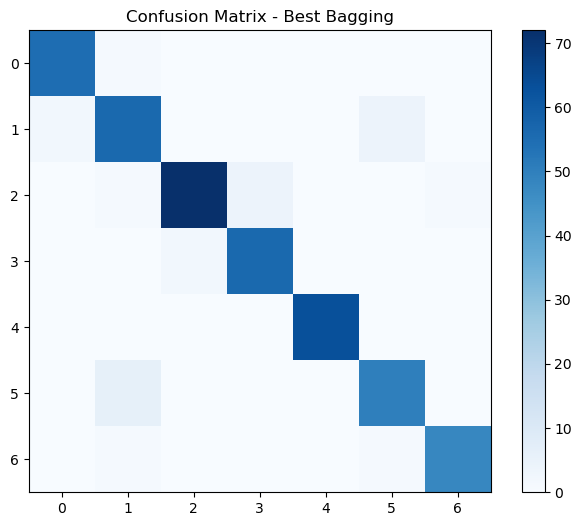

/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and w


Best Parameters for AdaBoost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 150}


/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hmi/anaconda3/envs/TF/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    learning_rate=0.1, n_estimators=150))])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv("ObesityDataSet.csv")

# Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Define the target variable and features
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and Random Forest classification
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', RandomForestClassifier())])

# Define the parameter grid search for Random Forest
param_grid_rf = {
    'clf__n_estimators': [50, 100, 150],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# apply GridSearchCV on Random Forest
grid_search_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("\nBest Params for Random Forest:", best_params_rf)

# fit the Random Forest model with the best parameters
rf_model = grid_search_rf.best_estimator_
rf_model.fit(X_train, y_train)

# get Prediction  on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the best Random Forest model
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\nBest Random Forest Metrics:")
print("acc : ", acc_rf, " , prec : ", prec_rf, " , recall : ", recall_rf, " , f1 : ", f1_rf)

# Confusion Matrix for the best Random Forest model
cm_best_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for the best Random Forest model:")
print(cm_best_rf)

# Plotting Confusion Matrix of  best Random Forest model
plt.figure(figsize=(8, 6))
plt.imshow(cm_best_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Random Forest')
plt.colorbar()
plt.show()

# Create a pipeline for preprocessing and Bagging classification
bagging_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                ('clf', BaggingClassifier(base_estimator=DecisionTreeClassifier()))])

# Define the parameter grid for Bagging
param_grid_bagging = {
    'clf__n_estimators': [10, 20, 30],
    'clf__max_samples': [0.7, 0.8, 0.9],
    'clf__max_features': [0.7, 0.8, 0.9]
}

# Perform GridSearchCV for Bagging
grid_search_bagging = GridSearchCV(bagging_pipe, param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters for Bagging
params_bagging = grid_search_bagging.best_params_
print("\nBest Params for Bagging:", params_bagging)

# Train the Bagging model with the best parameters
best_bagging_model = grid_search_bagging.best_estimator_
best_bagging_model.fit(X_train, y_train)

# get predciton form bagging model 
y_pred_bagging= best_bagging_model.predict(X_test)

# Evaluate the best Bagging model
acc_bagging= accuracy_score(y_test, y_pred_bagging)
prec_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')
print("\nBest Bagging Metrics:")
print("acc : ", acc_bagging, " , prec : ", prec_bagging, " , recall : ", recall_bagging, " , f1 : ", f1_bagging)

# Confusion Matrix for the best Bagging model
cm_best_bagging = confusion_matrix(y_test, y_pred_bagging)
print("Confusion Matrix for the best Bagging model:")
print(cm_best_bagging)

# Plotting Confusion Matrix of best Bagging model
plt.figure(figsize=(8, 6))
plt.imshow(cm_best_bagging, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Bagging')
plt.colorbar()
plt.show()

# Create a pipeline for preprocessing and AdaBoost classification
adaboost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'clf__n_estimators': [50, 100, 150],
    'clf__learning_rate': [0.01, 0.1, 1.0]
}

# Perform GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost_pipe, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

# Get the best parameters for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
print("\nBest Params for AdaBoost:", best_params_adaboost)

# Train the AdaBoost model with the best parameters
best_adaboost_model = grid_search_adaboost.best_estimator_
best_adaboost_model.fit(X_train, y_train)

# get predciton forn Adaboost model 
y_pred_adaboost= best_adaboost_model.predict(X_test)

# Evaluate the best AdaBoost model
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
prec_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')
print("\nBest AdaBoost Metrics:")
print("acc : ", acc_adaboost, " , prec : ", prec_adaboost, " , recall : ", recall_adaboost, " , f1 : ", f1_adaboost)

# Confusion Matrix for the best AdaBoost model
cm_best_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix for the best AdaBoost model:")
print(cm_best_adaboost)

# Plotting Confusion Matrix for the best AdaBoost model
plt.figure(figsize=(8, 6))
plt.imshow(cm_best_adaboost, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best AdaBoost')
plt.colorbar()
plt.show()

# Create a pipeline for preprocessing and Gradient Boosting classification
gradboost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('clf', GradientBoostingClassifier())])

# Define the parameter grid for Gradient Boosting
param_grid_gradboost = {
    'clf__n_estimators': [50, 100, 150],
    'clf__learning_rate': [0.01, 0.1, 1.0],
    'clf__max_depth': [3, 4, 5]
}

# Perform GridSearchCV for Gradient Boosting
grid_search_gradboost = GridSearchCV(gradboost_pipe, param_grid_gradboost, cv=5, scoring='accuracy')
grid_search_gradboost.fit(X_train, y_train)

# Get the best parameters for Gradient Boosting
best_params_gradboost = grid_search_gradboost.best_params_
print("\nBest Params for Gradient Boosting:", best_params_gradboost)

# Train the Gradient Boosting model with the best parameters
best_gradboost_model = grid_search_gradboost.best_estimator_
best_gradboost_model.fit(X_train, y_train)

# Predictions on the test set using the best Gradient Boosting model
y_pred_gradboost = best_gradboost_model.predict(X_test)

# Evaluate the best Gradient Boosting model
acc_gradboost = accuracy_score(y_test, y_pred_gradboost)
prec_gradboost = precision_score(y_test, y_pred_gradboost, average='weighted')
recall_gradboost = recall_score(y_test, y_pred_gradboost, average='weighted')
f1_gradboost = f1_score(y_test, y_pred_gradboost, average='weighted')
print("\nBest Gradient Boosting Metrics:")
print("acc : ", acc_gradboost, " , prec : ", prec_gradboost, " , recall : ", recall_gradboost, " , f1 : ", f1_gradboost)

# Confusion Matrix for the best Gradient Boosting model
cm_best_gradboost = confusion_matrix(y_test, y_pred_gradboost)
print("Confusion Matrix for the best Gradient Boosting model:")
print(cm_best_gradboost)


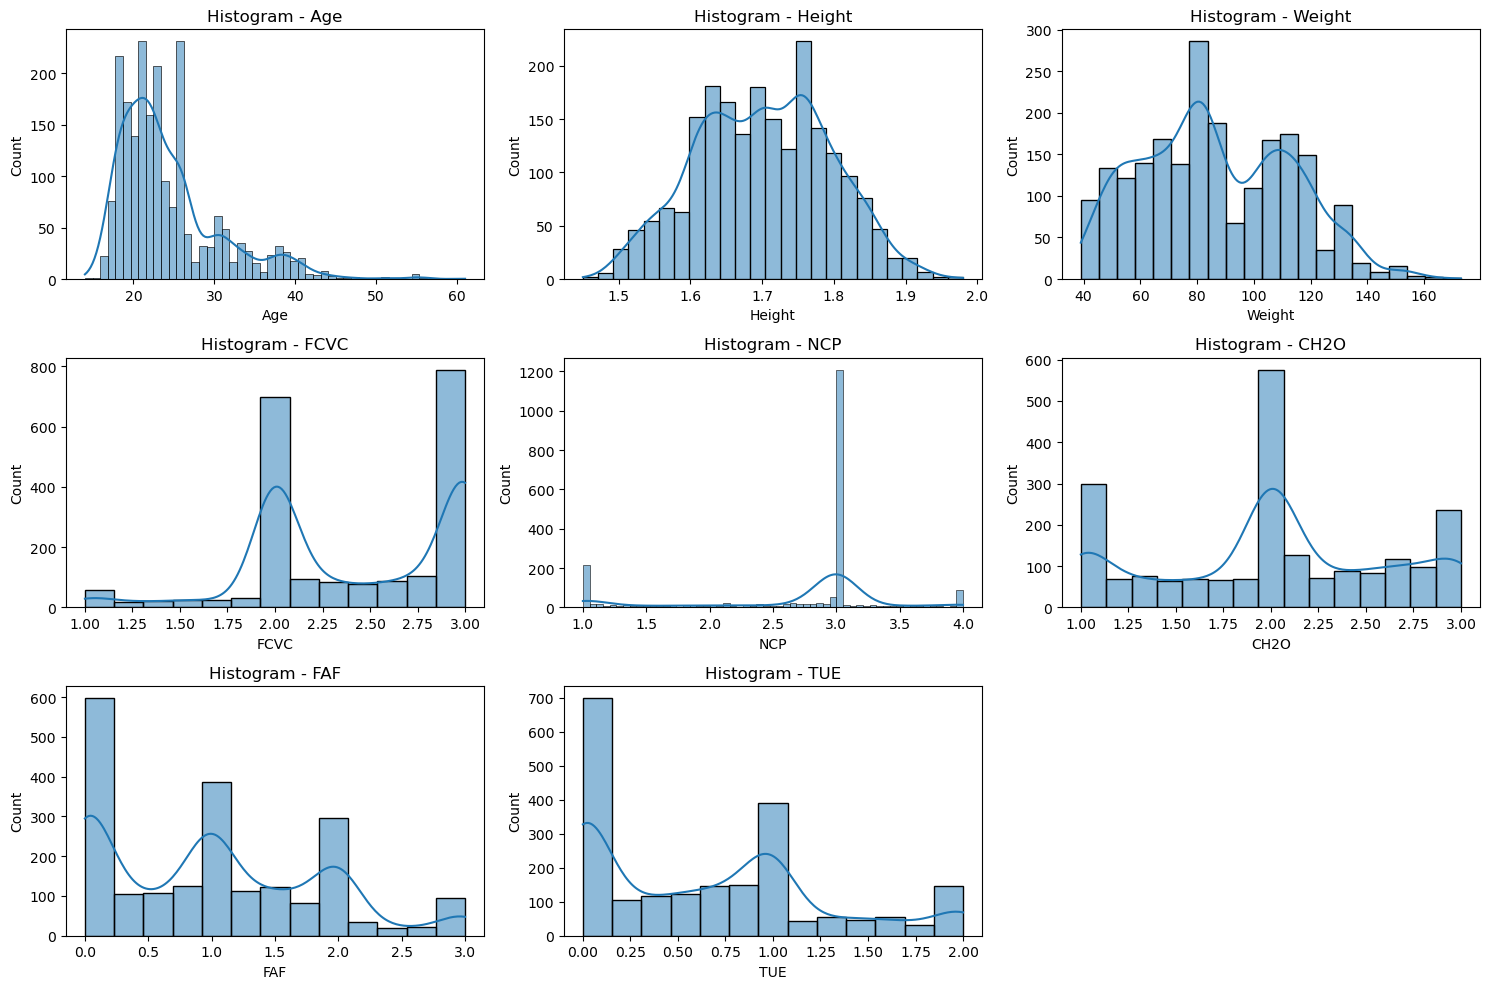

ValueError: could not convert string to float: 'Female'

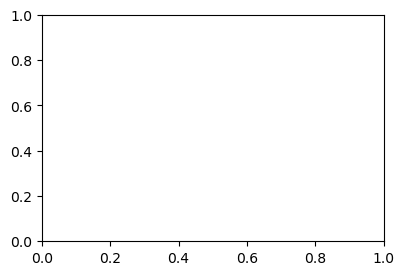

In [3]:

# Plot histograms for numerical features
import seaborn as sns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot bar plots for categorical features
categorical_cols = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data[column])
    plt.title(f'Bar Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()